<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis II

##                     Atul Wani - Jan 5, 2019 Batch (ML1 - Credit Fraud Detection)

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [Null value columns](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Observations](#section306)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Correlation of Features](#section401)<br/>
    - 4.2 [Features Density Plot](#section402)<br/>
    - 4.3 [Features Scaling](#section403)<br/>
- 5. [Analysis through questions](#section5)</br>
    - 5.1 [Number of Fraud and Normal transactions](#section501)<br/>
    - 5.2 [Max and Min Fraud Amount](#section502)<br/>
    - 5.3 [Normal Transaction below Max Fraud Amount](#section503)<br/>
- 6. [Data Sampling](#section6)<br/>
    - 6.1 [Normal Data](#section601)<br/>
    - 6.2 [SMOTE (Synthetic Minority Over-sampling Technique)](#section602)<br/>
    - 6.3 [RUS (Random Under Sampling)](#section603)<br/>
- 7. [Model Evaluation](#section7)<br/>
    - 7.1 [Logistic Regression Model](#section701)<br/>
        - 7.1.1 [Normal Data Sample](#section7011)<br/>
        - 7.1.2 [SMOTE Data Sample](#section7012)<br/>
        - 7.1.3 [RUS Data Sample](#section7013)<br/>
    - 7.2 [Decision Tree Model](#section702)<br/>
        - 7.2.1 [Normal Data Sample](#section7021)<br/>
        - 7.2.2 [SMOTE Data Sample](#section7022)<br/>
        - 7.2.3 [RUS Data Sample](#section7023)<br/>
    - 7.3 [Random Forest Model](#section703)<br/>
        - 7.3.1 [Normal Data Sample](#section7031)<br/>
        - 7.3.2 [SMOTE Data Sample](#section7032)<br/>
        - 7.3.3 [RUS Data Sample](#section7033)<br/>
    - 7.4 [Score Analysis](#section704)<br/>
        - 7.4.1 [Analyse model score built for Normal Data](#section7041)<br/>
        - 7.4.2 [Analyse model score built for SMOTE and RUS Data](#section7042)<br/>
- 8. [Conclusion](#section8)<br/>

<a id=section1></a> 
## 1. Problem Statement 



"This study is to identify the optimized machine learning algorithm to predict credit fraud transactions. The datasets contains transactions made by credit cards in September 2013 by european cardholders. The main task is to explore different views of the same problem and see what can be learned from the application of each different technique."
<a id=section101></a> 
### 1.1. Introduction
There has been a strong interest in the ethics of banking, as well as the moral complexity of fraudulent behavior. Fraud means obtaining services/goods and/or money by unethical means, and is a growing problem all over the world nowadays. Fraud deals with cases involving criminal purposes that, mostly, are difficult to identify. Credit cards are one of the most famous targets of fraud but not the only one; fraud can occur with any type of credit products, such as personal loans, home loans, and retail. Furthermore, the face of fraud has changed dramatically during the last few decades as technologies have changed and developed. A critical task to help businesses, and financial institutions including banks is to take steps to prevent fraud and to deal with it efficiently and effectively, when it does happen.

The greatest challenges that exist across the financial organizations in terms of customer impact are :
- Faster Fruad Detection
- Better Fraud Detection Alert
- Fraud Reduction
- Card Reissuance
- Faster Customer Communication

Credit card fraud has become more and more rampant in recent years. Along with the great increase in credit card transactions, credit card fraud has become increasingly rampant in recent years. In Modern day the fraud is one of the major causes of great financial losses, not only for merchants, individual clients are also affected. To improve merchants’ risk management level in an automatic and effective way, building an accurate and easy handling credit card risk monitoring system is one of the key tasks for the merchant banks. One aim of this study is to identify the user model that best identifies fraud cases. There are many ways of detection of credit card fraud. If one of these or combination of algorithm is applied into bank credit card fraud detection system, the probability of fraud transactions can be predicted soon after credit card transactions by the banks. And a series of anti-fraud strategies can be adopted to prevent banks from great losses before and reduce risks. 

Predictive Analytics will improve business processes, enhancing decision making and gain the ability to direct, optimize and automate decisions. Machine learning algorithms can be used to help aid in the fight against credit card fraud.

<a id=section102></a> 
### 1.2. Data source and dataset

- The dataset comprises of __284807 observations of 31 columns__. 
- The dataset contains only numerical input variables which are the result of a PCA transformation. 
- Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature 'Amount' is the transaction Amount
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


<a id=section2></a> 
## 2. Load the packages and data 

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

# Algorithms Library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Sampling Technique
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns
pd.set_option('display.max_rows', None)                                         # Display all records in outputs


In [2]:
# Dataset has taken from Kaggle site - https://www.kaggle.com/samkirkiles/credit-card-fraud/data
cr_data = pd.read_csv('creditcard.csv')              # Load in the dataset as cr_data

<a id=section3></a> 
## 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [3]:
cr_data.info()                                                                     # Display the data type for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

<a id=section302></a> 

In [4]:
cr_data.head()                                                                      # Display the first five rows of the data set

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

<a id=section303><a/>

In [5]:
cr_data.describe(include = 'all')                                                    # Descriptive statistics for the numerical variables

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.758743e-12 -8.252298e-13 -9.636929e-13  8.316157e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.591952e-13  4.247354e-13 -3.050180e-13  8.693344e-14 -1.179712e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   7.094854e-13  1.875015e-12  1.053488e-12  7.137527e-13 -1.491363e-13   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -5.225914e-13 -2.280712e-13 -6.428517e-13  4.958987e-13  7.060712e-13   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.766038e-12 -3.406543e-13 -5.713163e-13 -9.725303e-13  1.464139e-12   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.989087e-13 -5.615260e-13  3.332112e-12 -3.518886e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

<a id=section304></a> 

In [6]:
cr_data.isnull().sum()                                    # Display columns with number of null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<a id=section305><a/>

In [7]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(cr_data)
profile.to_file(outputfile="CreditData_before_preprocessing.html")

<a id=section306></a> 
### 3.6. Observations:

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Class</strong> (Boolean 1=Fraud 0=NoFraud)
 - <em>Numeric</em>: Everything else (float)
- <strong>Class</strong> has 2 distinct values. 0 as 'Non Fraud' and 1 as 'Fraud' Transactions. There are total 492 Fraud transaction whereas 284315 as normal transactions.
- There is no missing data in the entire dataset.
- Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. These features are required to convert to standared scaler to fit machine learning algorithms.

<a id=section4></a> 
## 4. Data Normalization

- There is no missing data in the entire dataset and features are obtained with PCA except Time and Amount field. We don't required any preporcessing of data like Data correction, missing vlaues etc. 

<a id=section401></a> 
### 4.1. Correlation Features

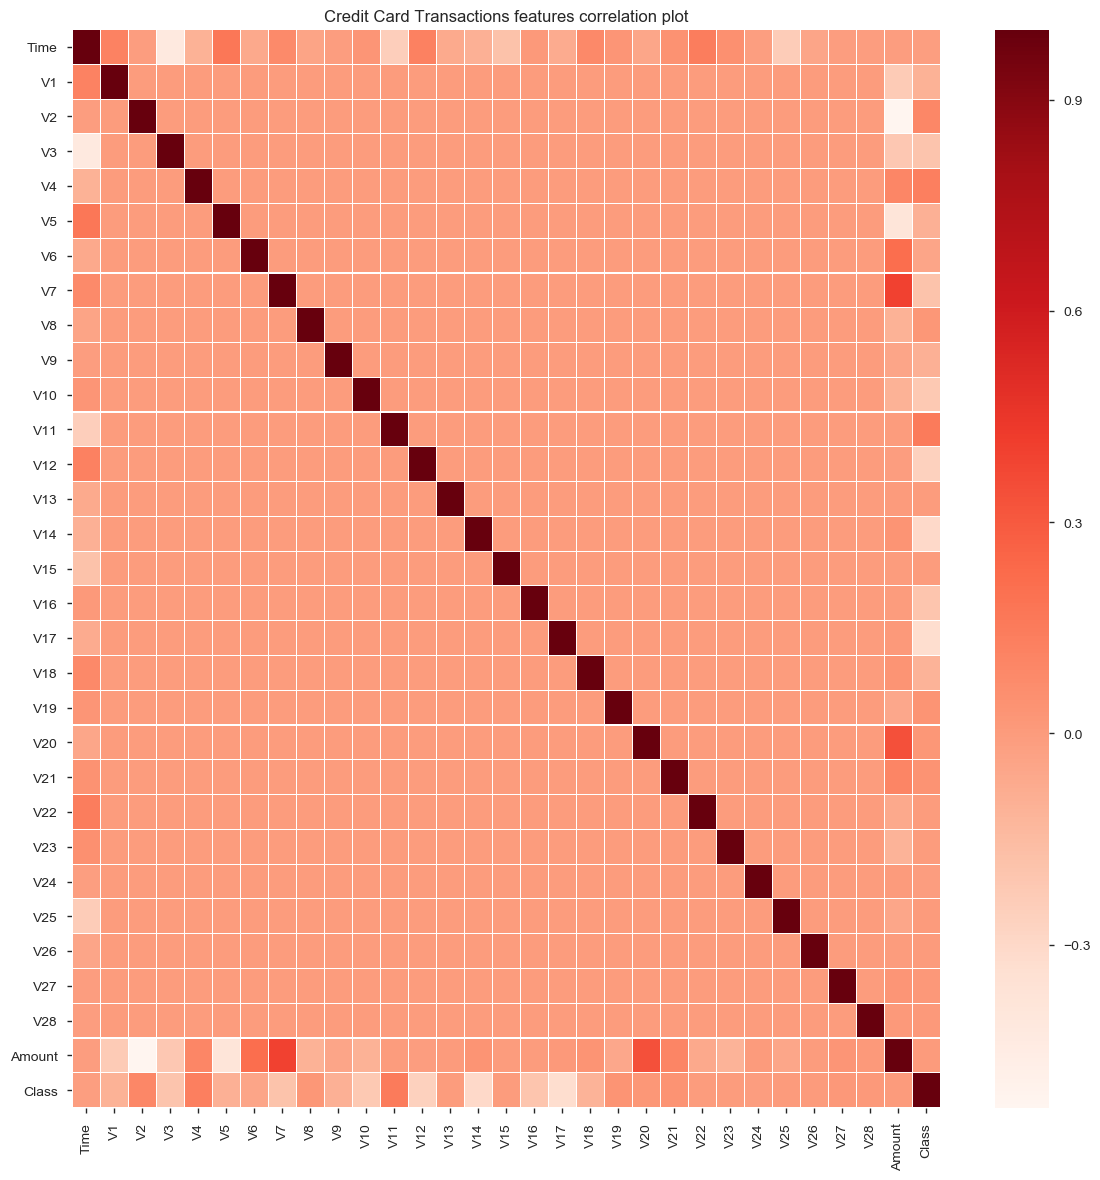

In [8]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
features_correlation = cr_data.corr()
sns.heatmap(features_correlation,xticklabels=features_correlation.columns,yticklabels=features_correlation.columns,linewidths=.1,cmap="Reds")

#### Observation

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V2 and V5).

Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

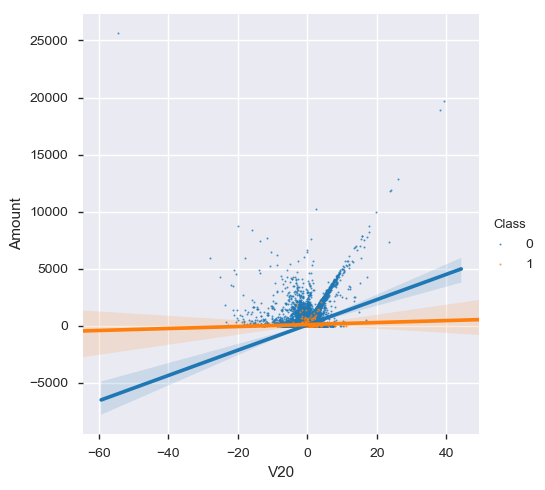

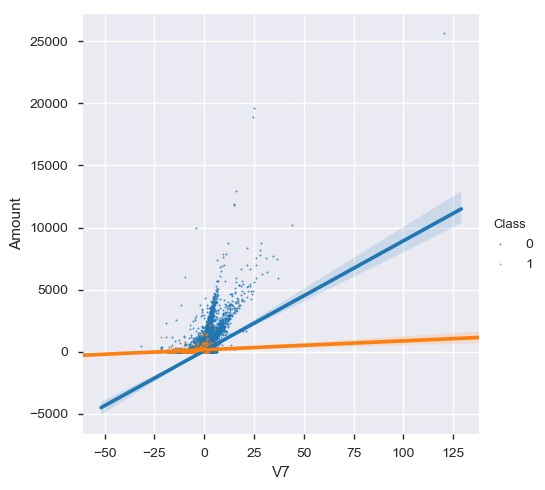

In [9]:
s = sns.lmplot(x='V20', y='Amount',data=cr_data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=cr_data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

#### Observation

This confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

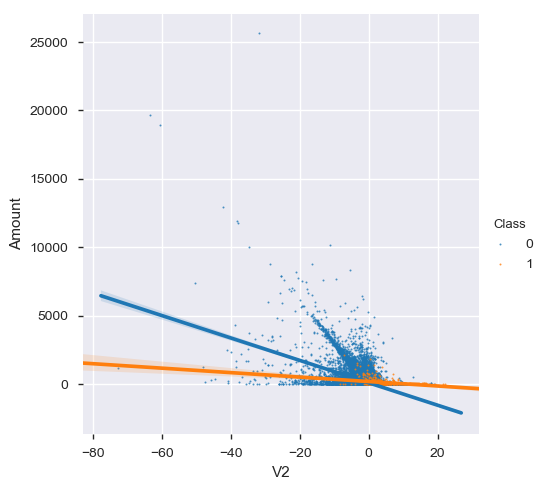

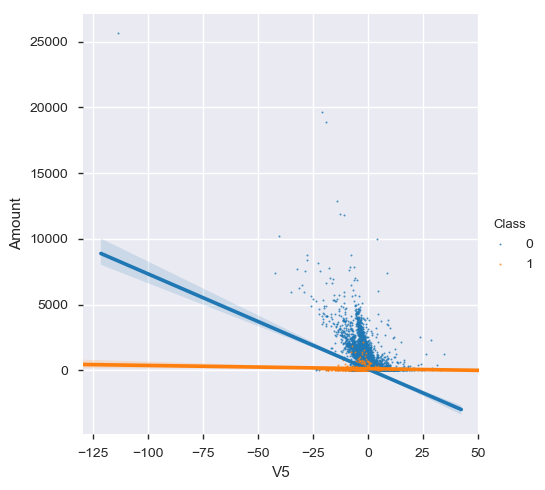

In [10]:
s = sns.lmplot(x='V2', y='Amount',data=cr_data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=cr_data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

#### Observation

This confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

<a id=section402></a> 
### 4.2. Features Density Plot

<Figure size 800x550 with 0 Axes>

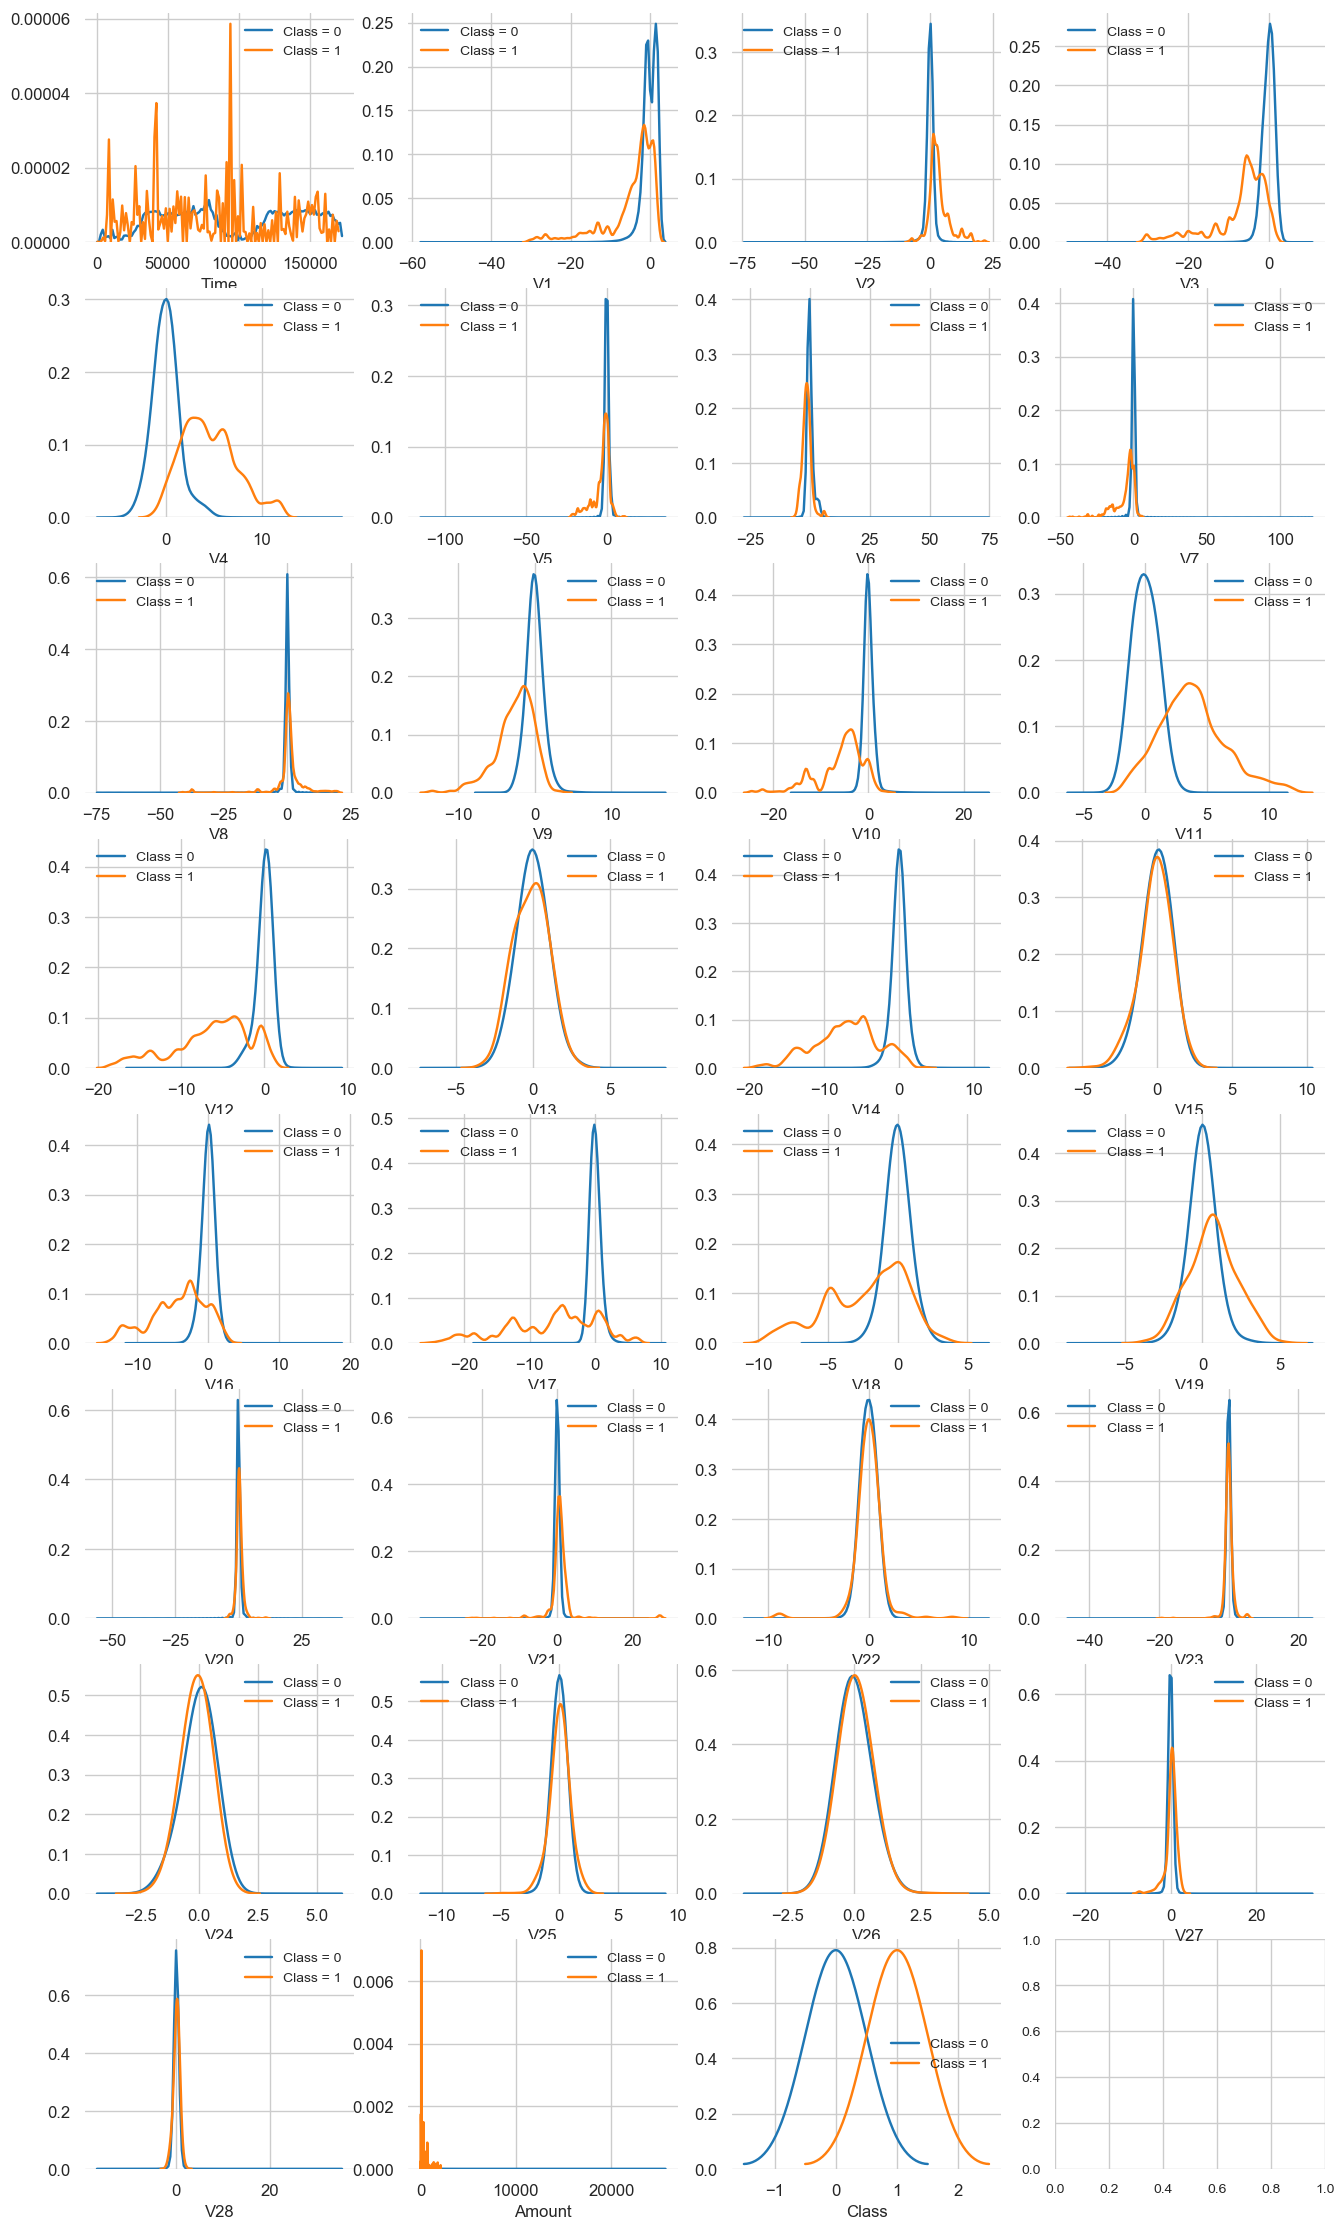

In [11]:
var = cr_data.columns.values

i = 0
t0 = cr_data.loc[cr_data['Class'] == 0]
t1 = cr_data.loc[cr_data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#### Observation

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.


<a id=section403></a> 
### 4.3. Features Scaling 

In [12]:
cr_data['normAmount'] = StandardScaler().fit_transform(cr_data['Amount'].values.reshape(-1, 1))
cr_data['normTime'] = StandardScaler().fit_transform(cr_data['Time'].values.reshape(-1, 1))
cr_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  normAmount  normTime  
0  149.62      0    0.244964 -1.996583  
1    2.69      0   -0.342475 -1.996583  
2  378.66      0    1.160686 -1.996562  
3  123.50      0    0.140534 -1.996562  
4   69.99      0   -0.073403 -1.996541

<a id=section5></a> 
## 5. Analysis through questions

<a id=section501></a>
#### 5.1 Number of Fraud and Normal transactions

In [13]:
# Number of Normal and Fraud transactions

fraud_data = len(cr_data[(cr_data.Class == 1)])
no_fraud_data = len(cr_data[(cr_data.Class == 0)])
print('There are only '+ str(fraud_data) + ' frauds in the original dataset, even though there are ' + str(no_fraud_data) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


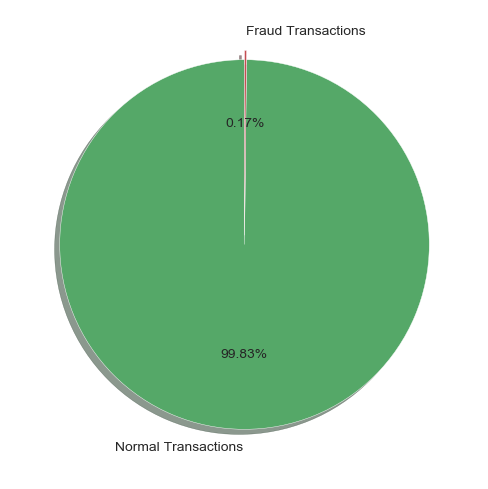

Normal Transactions  :  284315
Fraud Transactions   :  492


In [14]:
df=cr_data[(cr_data.Class == 0)]
dt=cr_data[(cr_data.Class == 1)]
slices=[len(df),(len(dt))]
labels=['Normal Transactions','Fraud Transactions']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.2f%%',colors=['g','r'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()
print("Normal Transactions  : ", len(df))
print("Fraud Transactions   : ", len(dt))


#### Observation

There are only 0.17% of Fraud Transactions in the dataset. Data is totally imbalanced.

<a id=section502></a>
#### 5.2 Max and Min Fraud Amount

In [15]:
max_fraud_amt = cr_data[(cr_data["Class"] == 1)].Amount.max()
print("Maximum amount for the Fraud Transaction: {}".format(cr_data[(cr_data["Class"] == 1)].Amount.max()))
print("Minimum amount for the Fraud Transaction: {}".format(cr_data[(cr_data["Class"] == 1)].Amount.min()))

Maximum amount for the Fraud Transaction: 2125.87
Minimum amount for the Fraud Transaction: 0.0


<a id=section503></a>
#### 5.3 Normal Transaction below Max Fraud Amount

In [16]:
print("Total normal transactions below {} : {}".format(max_fraud_amt,cr_data[(cr_data["Class"] == 0) & (cr_data["Amount"] <= max_fraud_amt )].Class.count()))

Total normal transactions below 2125.87 : 283712


#### Observation

If we take only normal transaction which are within the range of fraud amount transactions, still data is imbalanced. Lets use Data Sampling Technique to fit algorithms for further analysis.

<a id=section6></a> 
## 6. Data Sampling

Data is completly imbalanced. In this situation, the predictive model developed using conventional machine learning algorithms could be biased and inaccurate. We will be using Data sampling technique. We will be evaluating Logistic Regression, Decision Tree and Random Forest Algorithms for given dataset, for SMOTE sample data and for Random under sampling data and then will compare different scores.

<a id=section601></a> 
### 6.1. Normal Data

We have already scaled Time and Amount features earlier as normTime and normAmount. Lets drop 'Time' and 'Amount' columns.

In [17]:
cr_data = cr_data.drop(['Time','Amount'],axis=1)

In [18]:
# Preparing X independent and y dependent variable using Normal given data

X=pd.DataFrame()
y=pd.DataFrame()
feature_col = cr_data.columns[(cr_data.columns != 'Class')]
X = cr_data[feature_col]
y = cr_data['Class']

In [19]:
# Split the value of X and y into train and test datasets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print("\nCounts of label '1' in train data : {}".format(sum(y_train==1)))
print("Counts of label '0' in train data : {}".format(sum(y_train==0)))      
print("Counts of label '1' in test data : {}".format(sum(y_test==1)))
print("Counts of label '0' in test data : {}".format(sum(y_test==0)))           

Number transactions X_train dataset:  (227845, 30)
Number transactions y_train dataset:  (227845,)
Number transactions X_test dataset:  (56962, 30)
Number transactions y_test dataset:  (56962,)

Counts of label '1' in train data : 405
Counts of label '0' in train data : 227440
Counts of label '1' in test data : 87
Counts of label '0' in test data : 56875


We have total 227845 transactions for training the model and 56962 transaction for test. Note that we will be using training data (X_train and y_train) for SMOTE and RUS sampling methods and will fit the model and then will evaluate it against this testing data (X_test and y_test)

<a id=section602></a> 
### 6.2. SMOTE (Synthetic Minority Over-sampling Technique)

In [20]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))

Before OverSampling, counts of label '1': 405
Before OverSampling, counts of label '0': 227440 

After OverSampling, the shape of train_X: (454880, 30)
After OverSampling, the shape of train_y: (454880,) 

After OverSampling, counts of label '1': 227440
After OverSampling, counts of label '0': 227440


As you can see, our training data is now balanced using SMOTE.

<a id=section603></a> 
### 6.3. RUS (Random Under Sampling)

In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

rus = RandomUnderSampler(random_state=2)
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

print('After UnderSampling, the shape of train_X: {}'.format(X_train_rus.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_rus.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_rus==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_rus==0)))

Before OverSampling, counts of label '1': 405
Before OverSampling, counts of label '0': 227440 

After UnderSampling, the shape of train_X: (810, 30)
After UnderSampling, the shape of train_y: (810,) 

After UnderSampling, counts of label '1': 405
After UnderSampling, counts of label '0': 405


Training data has balanced using Random Under Sampling technique. Note that training data has reduced to 810. There are chances of missing information. Lets try to fit and evaluate models using all these sampling data.

<a id=section7></a> 
## 7. Model Evaluation

We will select the model with emphasis on lowering the predictions FN. A FN (a denied legitimate transaction) would be more detrimental to the consumer than a FP (an allowed fraudulent transaction)

In [22]:
def fit_model(X_train,y_train):
    '''
    This function is to fit the models on training datasets X_train and y_train.
    '''
    model.fit(X_train,y_train)

In [23]:
def pred_val(X_test):
    '''
    This function is to predict the test value using the built model.
    '''
    y_test_pre = model.predict(X_test)
    y_test_pro = model.predict_proba(X_test)[:,1]
    return y_test_pre,y_test_pro

In [24]:
def model_score(y_test_pred,y_test_prob,algo,pd_score):
    '''
    This function evaluate the models using below scores. Scores are stored in DataFrame for further analysis - 
    
    a. Classification Report
    b. Confusion Matrix
    c. F1-Score
    d. Precision Score
    e. Recall Score
    f. AUC score
    g. Accuracy Score
    
    This function also plot TPR vs FPR graph for AUC.
    '''

    target_names = ['No Fraud', 'Fraud']
    print(classification_report(y_test, y_test_pred, target_names=target_names))

    cnf = metrics.confusion_matrix(y_test,y_test_pred)
    TN = cnf[0][0]
    FP = cnf[0][1]
    FN = cnf[1][0]
    TP = cnf[1][1]
    fscr = round(metrics.f1_score(y_test, y_test_pred),3)
    pre = round(metrics.precision_score(y_test,y_test_pred),3)
    recl = round(metrics.recall_score(y_test,y_test_pred),3)
    auc = round(metrics.roc_auc_score(y_test,y_test_prob),3)
    acc = round(metrics.accuracy_score(y_test,y_test_pred),3)


    # Performance metrics evaluation
    print("\nConfusion Matrix:\n",cnf)
    print("\nAccuracy  :",acc)
    print("Precision :",pre)
    print("Recall    :",recl)
    print('F1_score  :',fscr)
    print("AUC       :",auc)

    # Store the scores in DataFrame for further analysis
    pd_data = [[algo, pre, recl, fscr, auc, acc, TN, FN, FP, TP]]
    pd_scr = pd.DataFrame(pd_data)

    
    # plotting the ROC curve
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_test_prob)
    plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
    plt.plot([0,1],[0,1],'r-.')
    plt.xlim([-0.2,1.2])
    plt.ylim([-0.2,1.2])

    plt.title('Receiver Operating Characteristic\nLogistic Regression')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    return pd.concat([pd_score,pd_scr],axis=0)    


In [25]:
def conf_matrix(y_test_pred):
    '''
    This function creates Confusion Matrix graph
    '''
    cm = pd.crosstab(y_test,y_test_pred, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

In [26]:
def model_eval(X_train,y_train,X_test,algo,pd_score):
    '''
    This function performs all the steps to evaluate model - 
    a. Fit the model
    b. Predict test value using built model
    c. Score the model
    d. Confusion Matrix graph
    
    It returns updated score DataFrame.
    '''
    fit_model(X_train,y_train)
    y_test_pred,y_test_prob = pred_val(X_test)
    pdscr = model_score(y_test_pred,y_test_prob,algo,pd_score)
    conf_matrix(y_test_pred)
    
    return pdscr


In [27]:
# Create dataframe to store all scores of all models
pdscr = pd.DataFrame()
pd_score = pd.DataFrame()

<a id=section701></a> 
### 7.1. Logistic Regression Model

In [28]:
# Instantiate Linear regression model
model = LogisticRegression()

<a id=section7011></a>
#### 7.1.1 Normal Data Sample

*** LR Scores for Normal Data ***

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56875
       Fraud       0.83      0.55      0.66        87

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.91      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56865    10]
 [   39    48]]

Accuracy  : 0.999
Precision : 0.828
Recall    : 0.552
F1_score  : 0.662
AUC       : 0.963


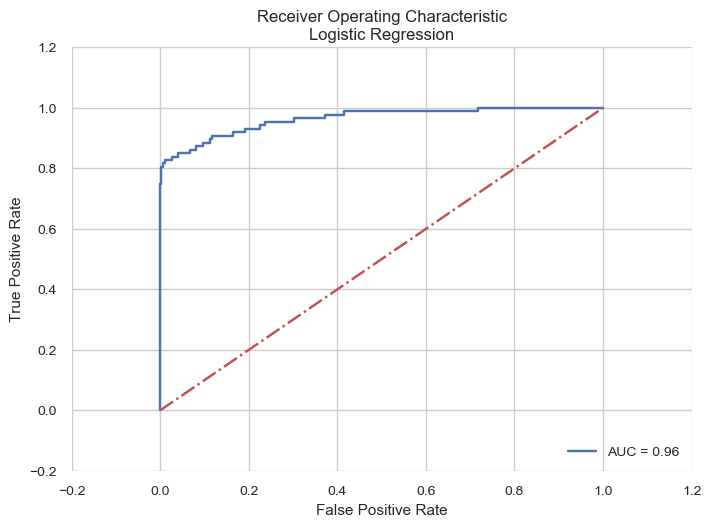

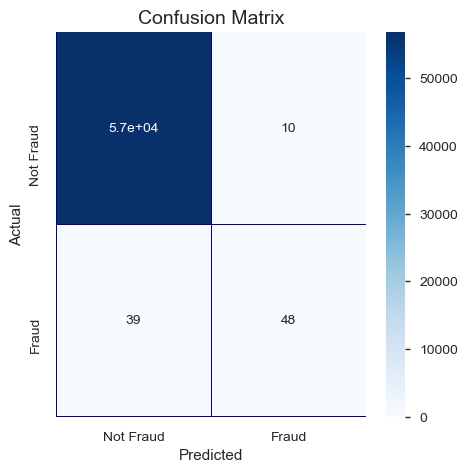

In [29]:
print("*** LR Scores for Normal Data ***\n")
pdscr = model_eval(X_train,y_train,X_test,'LR Normal',pd_score)

<a id=section7012></a>
#### 7.1.2 SMOTE Data Sample

*** LR Scores for SMOTE Data ***

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56875
       Fraud       0.06      0.89      0.11        87

   micro avg       0.98      0.98      0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Confusion Matrix:
 [[55692  1183]
 [   10    77]]

Accuracy  : 0.979
Precision : 0.061
Recall    : 0.885
F1_score  : 0.114
AUC       : 0.979


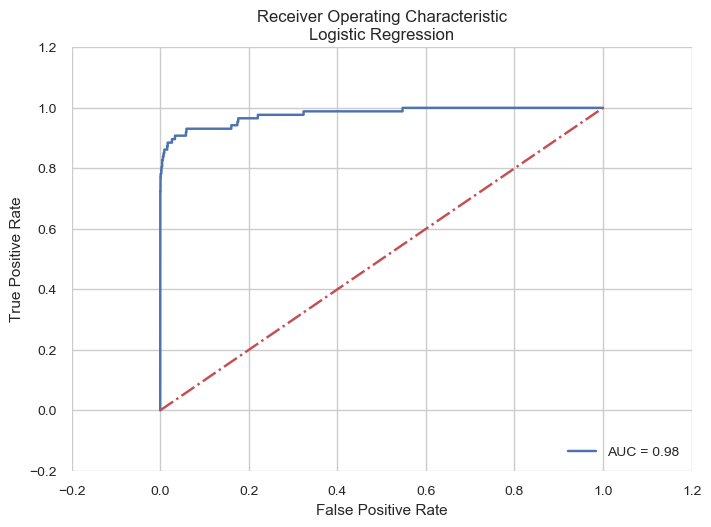

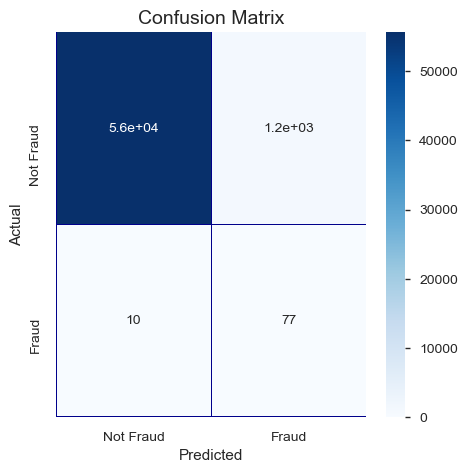

In [30]:
print("*** LR Scores for SMOTE Data ***\n")
pdscr = model_eval(X_train_sm,y_train_sm,X_test,'LR SMOTE',pdscr)

<a id=section7013></a>
#### 7.1.3 RUS Data Sample

*** LR Scores for RUS Data ***

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.98     56875
       Fraud       0.04      0.90      0.07        87

   micro avg       0.97      0.97      0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962


Confusion Matrix:
 [[54943  1932]
 [    9    78]]

Accuracy  : 0.966
Precision : 0.039
Recall    : 0.897
F1_score  : 0.074
AUC       : 0.979


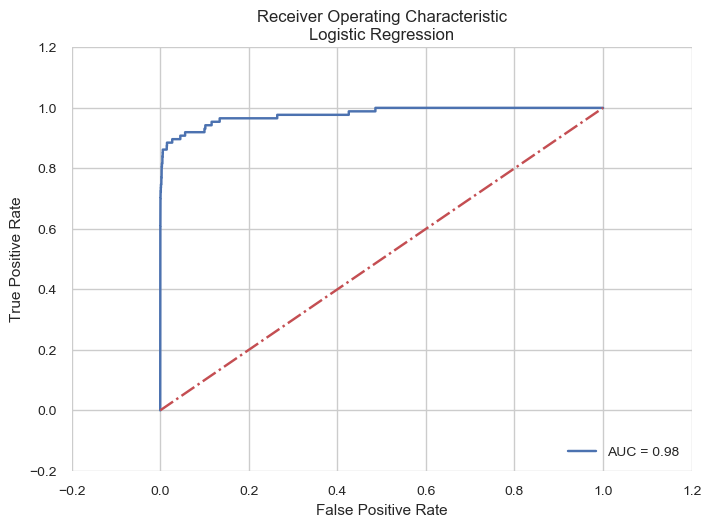

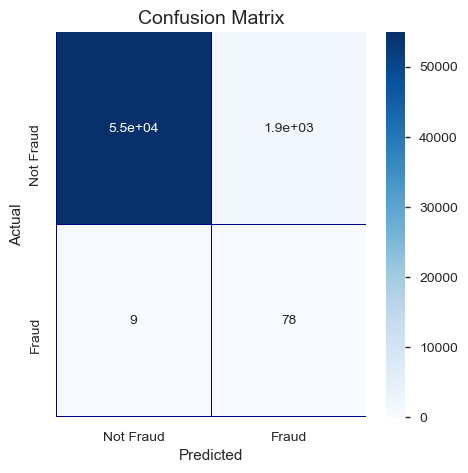

In [31]:
print("*** LR Scores for RUS Data ***\n")
pdscr = model_eval(X_train_rus,y_train_rus,X_test,'LR RUS',pdscr)

#### Observation

- Logistic model built with normal given dataset has given accuracy of 99.9%. But Accuracy is not the metric to use when working with an imbalanced dataset. It is misleading. 
- LR model with SMOTE and RUS has given better AUC around 97.9% which is better than Normal data model.
- LR model with SMOTE has provided better accuracy than RUS model
- LR model with SMOTE has predicted better true values (TP+TN) than RUS model
- SMOTE model has given better F1-score than RUS model
- It is observed that Logistic Regression model built using SMOTE data sample has given better performance.

<a id=section702></a> 
### 7.2. Decision Tree Model

In [32]:
# Instantiate Decision Tree model
model = DecisionTreeClassifier(random_state = 0)

<a id=section7021></a>
#### 7.2.1 Normal Data Sample

*** Decision Tree Scores for Normal Data ***

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56875
       Fraud       0.78      0.74      0.76        87

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.89      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56857    18]
 [   23    64]]

Accuracy  : 0.999
Precision : 0.78
Recall    : 0.736
F1_score  : 0.757
AUC       : 0.868


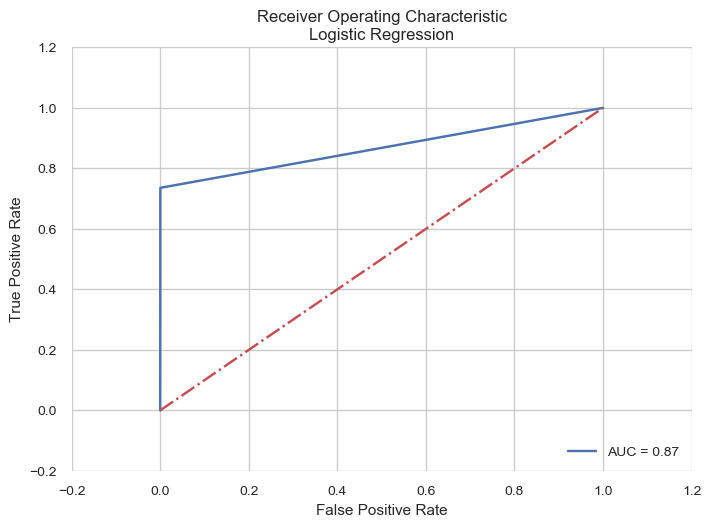

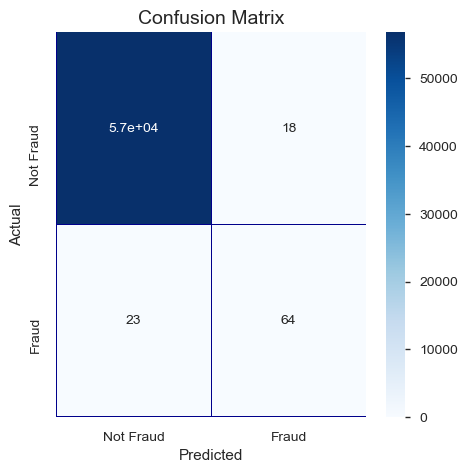

In [33]:
print("*** Decision Tree Scores for Normal Data ***\n")
pdscr = model_eval(X_train,y_train,X_test,'DT Normal',pdscr)

<a id=section7022></a>
#### 7.2.2 SMOTE Data Sample

*** Decision Tree Scores for SMOTE Data ***

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56875
       Fraud       0.34      0.75      0.47        87

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.67      0.87      0.73     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56751   124]
 [   22    65]]

Accuracy  : 0.997
Precision : 0.344
Recall    : 0.747
F1_score  : 0.471
AUC       : 0.872


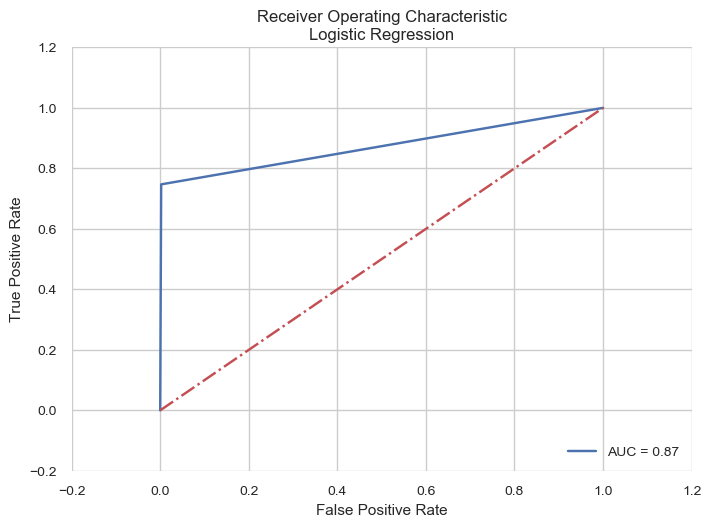

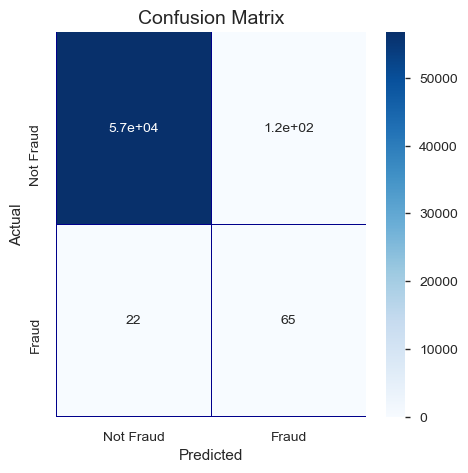

In [34]:
print("*** Decision Tree Scores for SMOTE Data ***\n")
pdscr = model_eval(X_train_sm,y_train_sm,X_test,'DT SMOTE',pdscr)

<a id=section7023></a>
#### 7.2.3 RUS Data Sample

*** Decision Tree Scores for RUS Data ***

              precision    recall  f1-score   support

    No Fraud       1.00      0.90      0.95     56875
       Fraud       0.01      0.92      0.03        87

   micro avg       0.90      0.90      0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.95     56962


Confusion Matrix:
 [[51227  5648]
 [    7    80]]

Accuracy  : 0.901
Precision : 0.014
Recall    : 0.92
F1_score  : 0.028
AUC       : 0.91


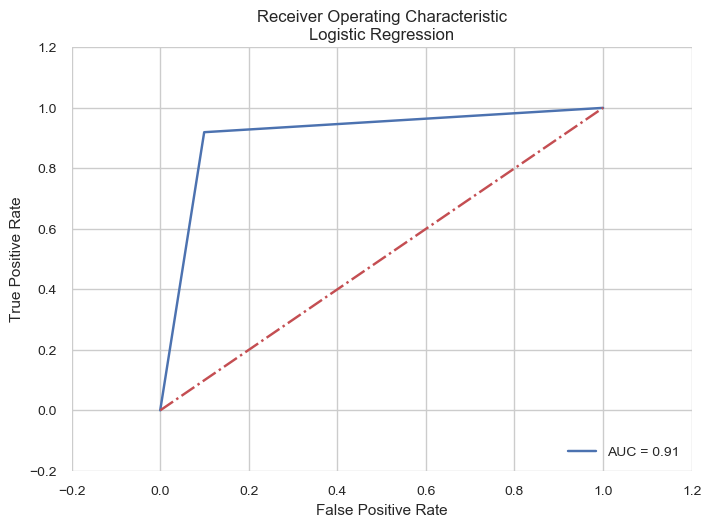

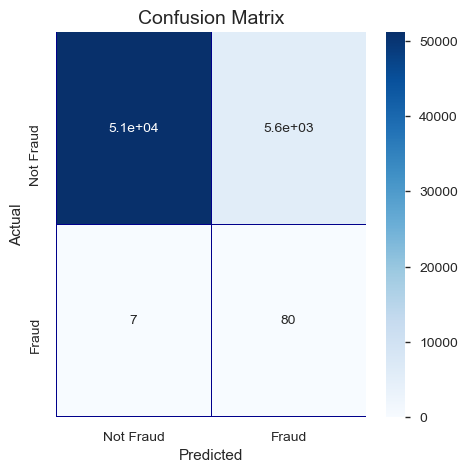

In [35]:
print("*** Decision Tree Scores for RUS Data ***\n")
pdscr = model_eval(X_train_rus,y_train_rus,X_test,'DT RUS',pdscr)

#### Observation

- Decision Tree model built with normal given dataset has given accuracy of 99.9%. But Accuracy is not the metric to use when working with an imbalanced dataset. It is misleading. 
- DT model with RUS has given better AUC score around 91% which is better than SMOTE and Normal data model.
- DT model with RUS has given huge False Positive (FP). This will irritate card user if they get more notification for the transactions which are not really Fraud transactions.
- DT model with SMOTE has provided better accuracy than RUS model
- DT model with SMOTE has predicted better true values (TP+TN) than RUS model
- SMOTE model has given better F1-score than RUS model
- It is observed that Decision Tree model built using SMOTE data sample has given better performance.

<a id=section703></a> 
### 7.3. Random Forest Model

In [36]:
# Instantiate Random Forest model
model = RandomForestClassifier(random_state = 0)

<a id=section7031></a>
#### 7.3.1 Normal Data Sample

*** Random Forest Scores for Normal Data ***

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56875
       Fraud       0.91      0.71      0.80        87

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.96      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56869     6]
 [   25    62]]

Accuracy  : 0.999
Precision : 0.912
Recall    : 0.713
F1_score  : 0.8
AUC       : 0.896


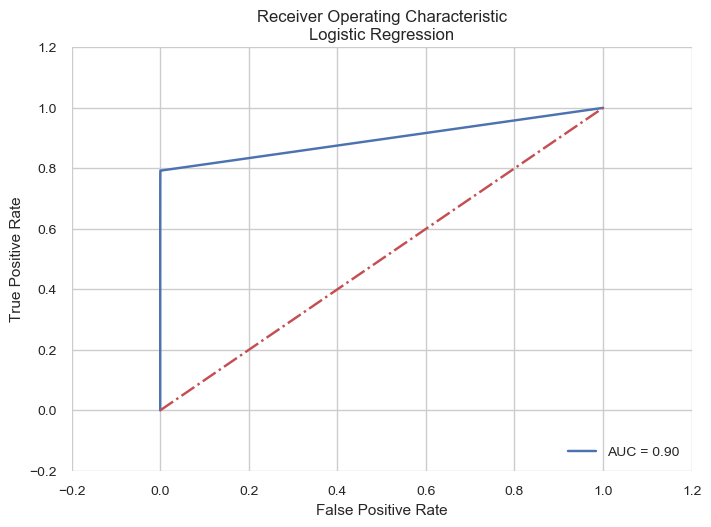

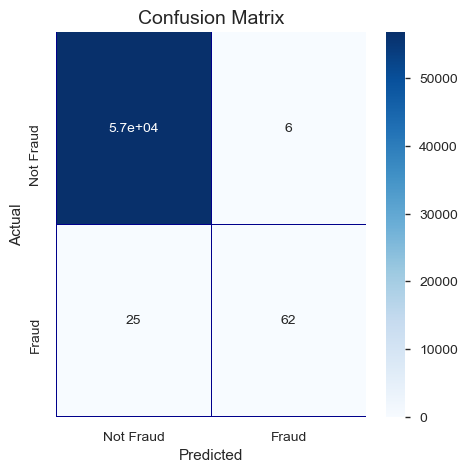

In [37]:
print("*** Random Forest Scores for Normal Data ***\n")
pdscr = model_eval(X_train,y_train,X_test,'RF Normal',pdscr)

<a id=section7032></a>
#### 7.3.2 SMOTE Data Sample

*** Random Forest Scores for SMOTE Data ***

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56875
       Fraud       0.87      0.77      0.82        87

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56865    10]
 [   20    67]]

Accuracy  : 0.999
Precision : 0.87
Recall    : 0.77
F1_score  : 0.817
AUC       : 0.917


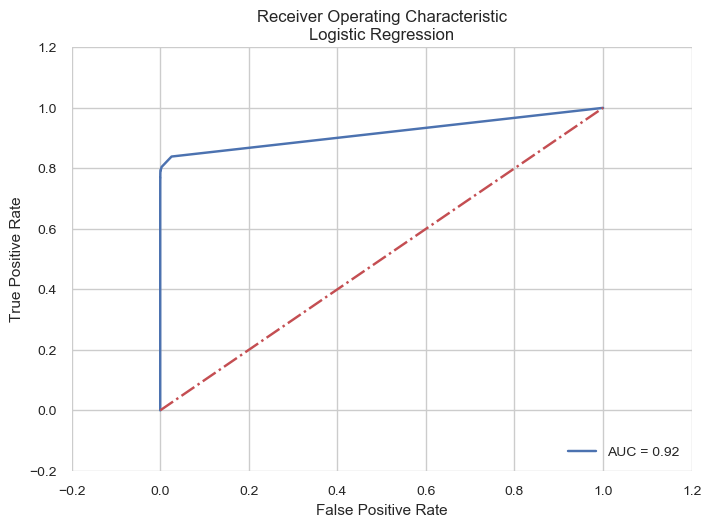

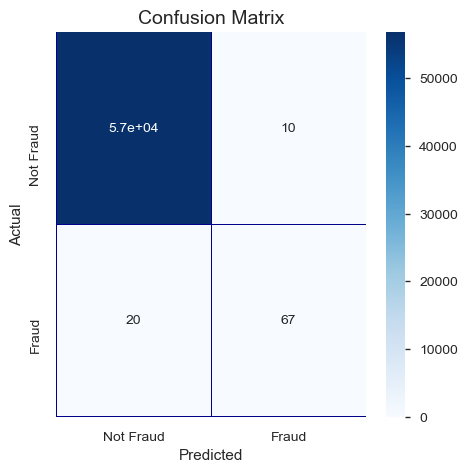

In [38]:
print("*** Random Forest Scores for SMOTE Data ***\n")
pdscr = model_eval(X_train_sm,y_train_sm,X_test,'RF SMOTE',pdscr)

<a id=section7033></a>
#### 7.3.3 RUS Data Sample

*** Random Forest Scores for RUS Data ***

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56875
       Fraud       0.05      0.85      0.09        87

   micro avg       0.97      0.97      0.97     56962
   macro avg       0.52      0.91      0.54     56962
weighted avg       1.00      0.97      0.99     56962


Confusion Matrix:
 [[55386  1489]
 [   13    74]]

Accuracy  : 0.974
Precision : 0.047
Recall    : 0.851
F1_score  : 0.09
AUC       : 0.975


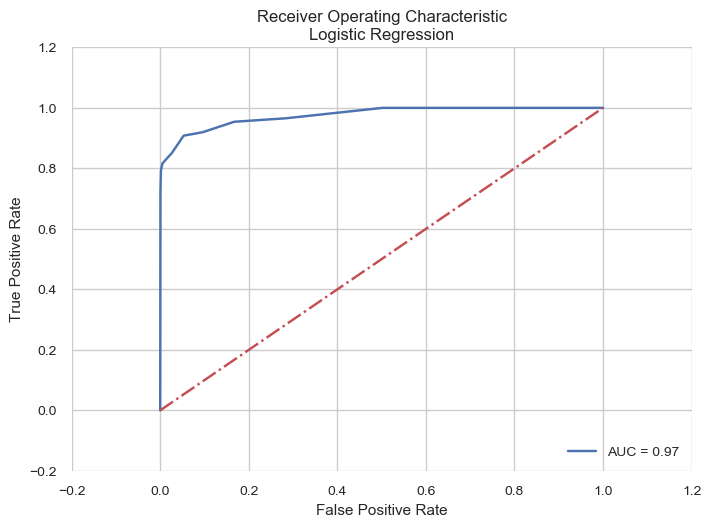

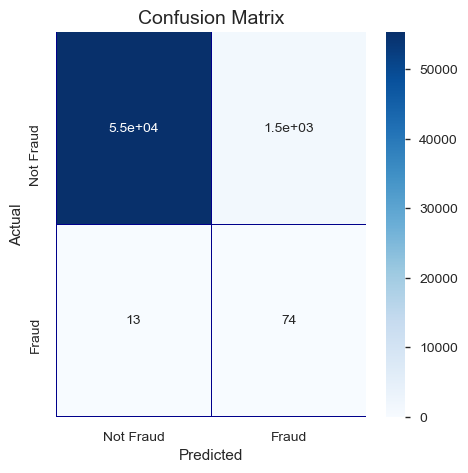

In [39]:
print("*** Random Forest Scores for RUS Data ***\n")
pdscr = model_eval(X_train_rus,y_train_rus,X_test,'RF RUS',pdscr)

#### Observation

- Random Forest model built with normal given dataset has given accuracy of 99.9%. But Accuracy is not the metric to use when working with an imbalanced dataset. It is misleading. 
- RF model with RUS has given better AUC score around 97.5% which is better than SMOTE and Normal data model.
- RF model with RUS has given better True Positive (TP) and less False Negative (FN). It has given Recall score as 0.85.
- RF model with SMOTE has predicted better true values (TP+TN) than RUS model
- SMOTE model has given better F1-score than RUS model
- By comparing, AUC, TP, FN and Recall score, it is observed that Random Forest model built using RUS data sample has given better performance.

<a id=section704></a> 
### 7.4. Score Analysis

In [40]:
pdscr

0      1      2      3      4      5      6   7     8   9
0  LR Normal  0.828  0.552  0.662  0.963  0.999  56865  39    10  48
0   LR SMOTE  0.061  0.885  0.114  0.979  0.979  55692  10  1183  77
0     LR RUS  0.039  0.897  0.074  0.979  0.966  54943   9  1932  78
0  DT Normal  0.780  0.736  0.757  0.868  0.999  56857  23    18  64
0   DT SMOTE  0.344  0.747  0.471  0.872  0.997  56751  22   124  65
0     DT RUS  0.014  0.920  0.028  0.910  0.901  51227   7  5648  80
0  RF Normal  0.912  0.713  0.800  0.896  0.999  56869  25     6  62
0   RF SMOTE  0.870  0.770  0.817  0.917  0.999  56865  20    10  67
0     RF RUS  0.047  0.851  0.090  0.975  0.974  55386  13  1489  74

In [41]:
pdscr.columns = ['Model','Precision','Recall','F1-Score','AUC','Accuracy','TN','FN','FP','TP']

In [42]:
pdscr.reset_index(drop=True,inplace=True)
pdscr

Model  Precision  Recall  F1-Score    AUC  Accuracy     TN  FN    FP  \
0  LR Normal      0.828   0.552     0.662  0.963     0.999  56865  39    10   
1   LR SMOTE      0.061   0.885     0.114  0.979     0.979  55692  10  1183   
2     LR RUS      0.039   0.897     0.074  0.979     0.966  54943   9  1932   
3  DT Normal      0.780   0.736     0.757  0.868     0.999  56857  23    18   
4   DT SMOTE      0.344   0.747     0.471  0.872     0.997  56751  22   124   
5     DT RUS      0.014   0.920     0.028  0.910     0.901  51227   7  5648   
6  RF Normal      0.912   0.713     0.800  0.896     0.999  56869  25     6   
7   RF SMOTE      0.870   0.770     0.817  0.917     0.999  56865  20    10   
8     RF RUS      0.047   0.851     0.090  0.975     0.974  55386  13  1489   

   TP  
0  48  
1  77  
2  78  
3  64  
4  65  
5  80  
6  62  
7  67  
8  74

<a id=section7041></a>
#### 7.4.1 Analyse model score built for Normal Data

In [43]:
pdscr[((pdscr.Model == 'LR Normal') | (pdscr.Model == 'DT Normal') | (pdscr.Model == 'RF Normal'))]

Model  Precision  Recall  F1-Score    AUC  Accuracy     TN  FN  FP  TP
0  LR Normal      0.828   0.552     0.662  0.963     0.999  56865  39  10  48
3  DT Normal      0.780   0.736     0.757  0.868     0.999  56857  23  18  64
6  RF Normal      0.912   0.713     0.800  0.896     0.999  56869  25   6  62

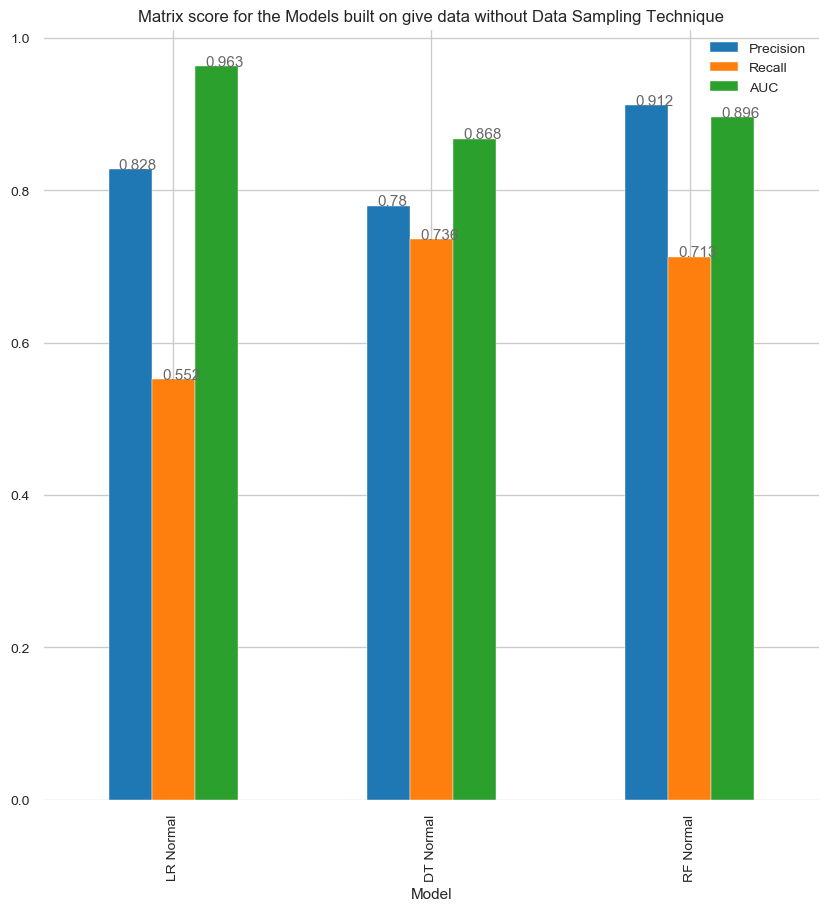

In [87]:
ax = pdscr[((pdscr.Model == 'LR Normal') | (pdscr.Model == 'DT Normal') | (pdscr.Model == 'RF Normal'))].plot(x='Model',y=['Precision','Recall','AUC',],kind='bar',figsize=(10,10))
plt.title("Matrix score for the Models built on give data without Data Sampling Technique")
for i in ax.patches:
        ax.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 3)), fontsize=11, color='dimgrey')


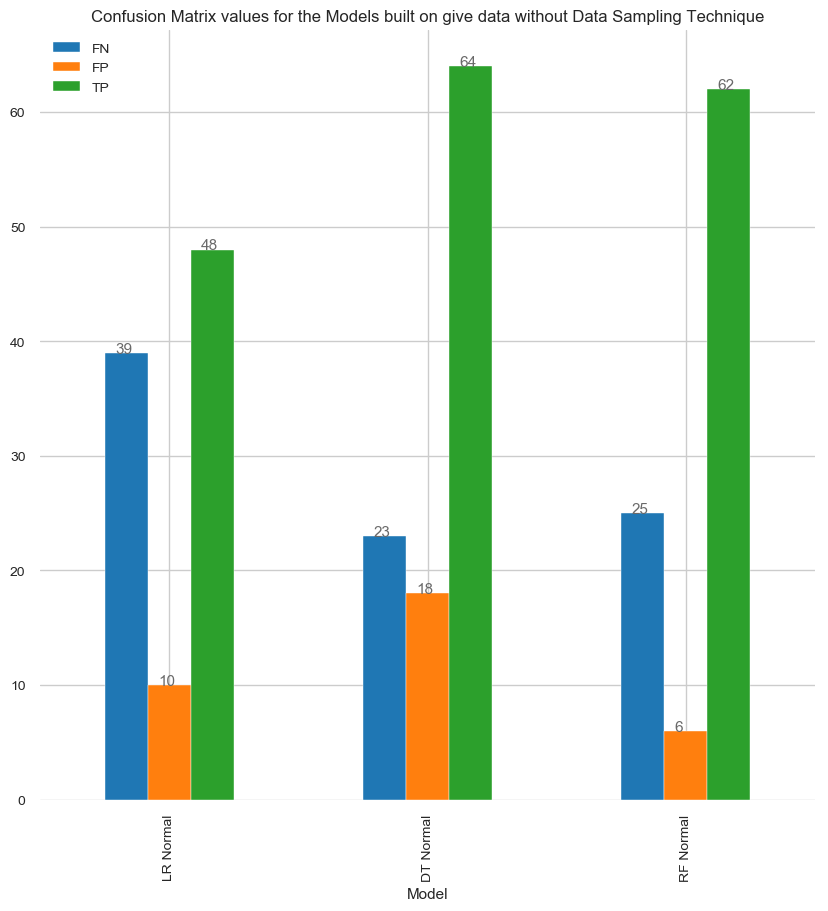

In [49]:
ax = pdscr[((pdscr.Model == 'LR Normal') | (pdscr.Model == 'DT Normal') | (pdscr.Model == 'RF Normal'))].plot(x='Model',y=['FN','FP','TP',],kind='bar',figsize=(10,10))
plt.title("Confusion Matrix values for the Models built on give data without Data Sampling Technique")
for i in ax.patches:
        ax.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')


#### Observation

- All LR, Decision Tree and Random Forest model built with normal given dataset has given accuracy of 99.9%. But Accuracy is not the metric to use when working with an imbalanced dataset. It is misleading. 
- LR model has given better AUC score around 96.3% than RF and DT model bulit on Normal data sample.
- DT model has better Recall score (74%), less FN value, high FP value and has identified more TP transactions than LR and RF model bulit on Normal data sample.
- By comparing these parameters, it is observed that Decision Tree performed better than LR and Random Forest model built on normal data sample.

<a id=section7042></a>
#### 7.4.2 Analyse model score built for SMOTE and RUS Data

In [50]:
pdscr[((pdscr.Model != 'LR Normal') & (pdscr.Model != 'DT Normal') & (pdscr.Model != 'RF Normal'))]

Model  Precision  Recall  F1-Score    AUC  Accuracy     TN  FN    FP  TP
1  LR SMOTE      0.061   0.885     0.114  0.979     0.979  55692  10  1183  77
2    LR RUS      0.039   0.897     0.074  0.979     0.966  54943   9  1932  78
4  DT SMOTE      0.344   0.747     0.471  0.872     0.997  56751  22   124  65
5    DT RUS      0.014   0.920     0.028  0.910     0.901  51227   7  5648  80
7  RF SMOTE      0.870   0.770     0.817  0.917     0.999  56865  20    10  67
8    RF RUS      0.047   0.851     0.090  0.975     0.974  55386  13  1489  74

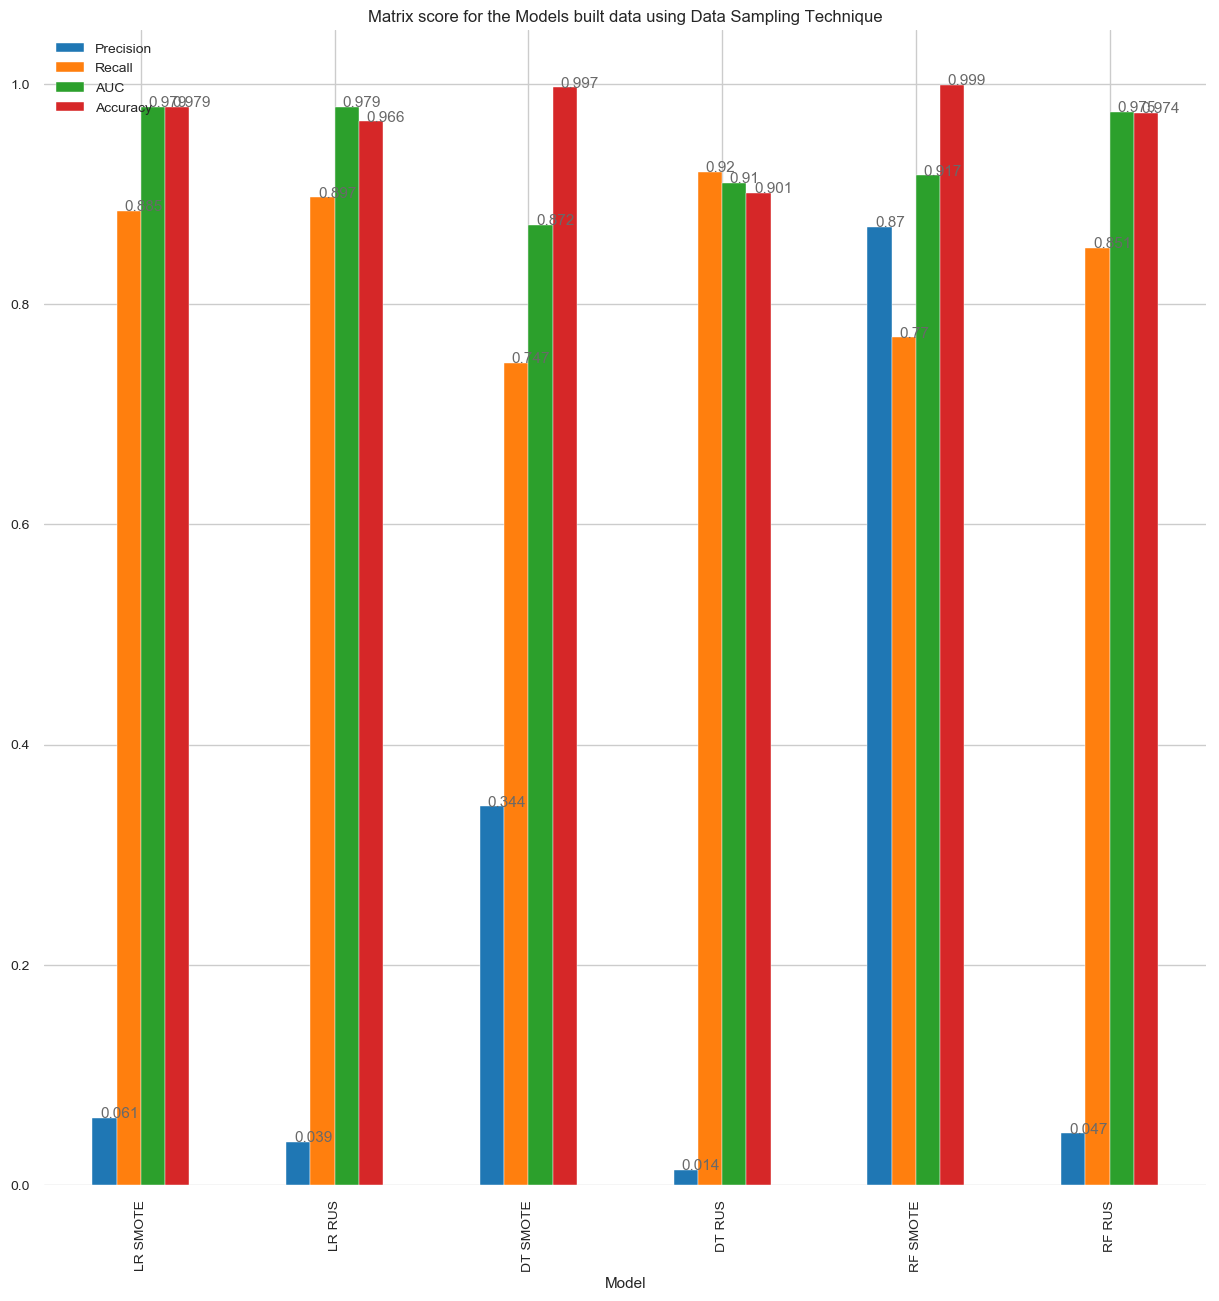

In [57]:
ax = pdscr[((pdscr.Model != 'LR Normal') & (pdscr.Model != 'DT Normal') & (pdscr.Model != 'RF Normal'))].plot(x='Model',y=['Precision','Recall','AUC','Accuracy'],kind='bar',figsize=(15,15))
plt.title("Matrix score for the Models built data using Data Sampling Technique")
for i in ax.patches:
        ax.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 3)), fontsize=11, color='dimgrey')

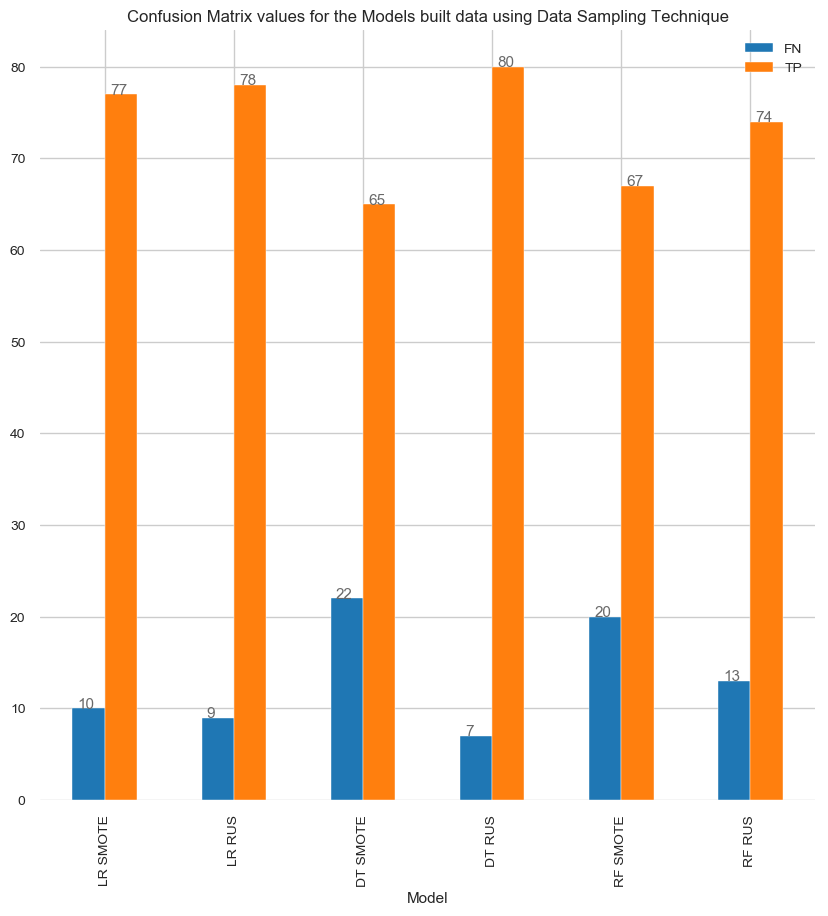

In [54]:
ax = pdscr[((pdscr.Model != 'LR Normal') & (pdscr.Model != 'DT Normal') & (pdscr.Model != 'RF Normal'))].plot(x='Model',y=['FN','TP',],kind='bar',figsize=(10,10))
plt.title("Confusion Matrix values for the Models built data using Data Sampling Technique")
for i in ax.patches:
        ax.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')


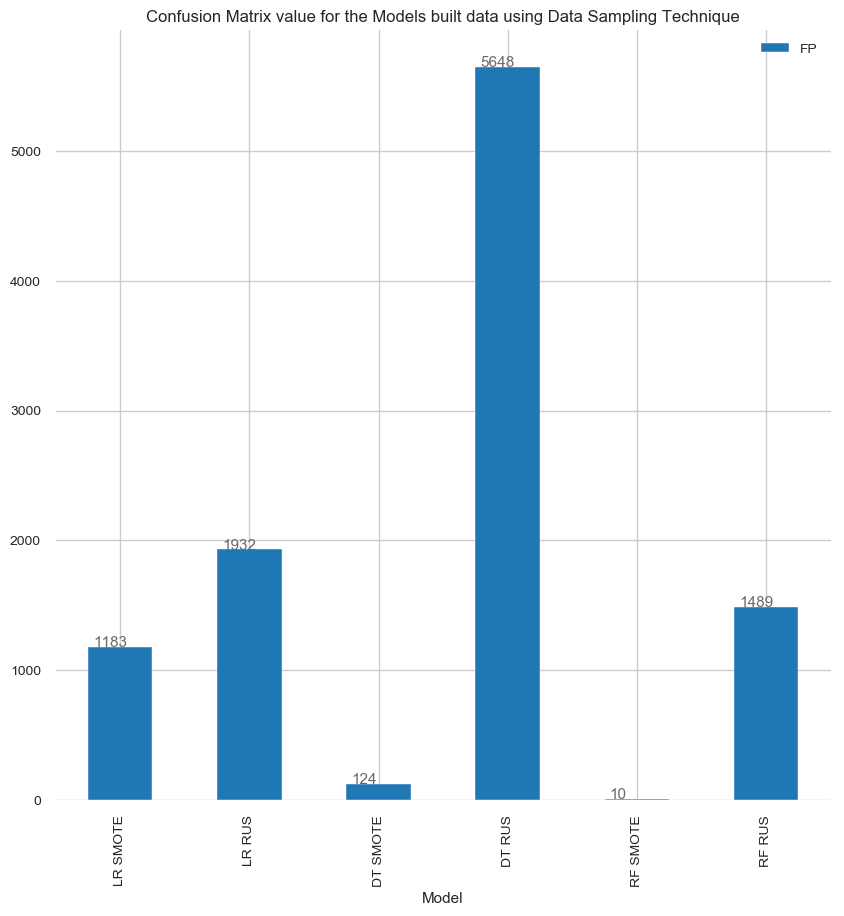

In [55]:
ax = pdscr[((pdscr.Model != 'LR Normal') & (pdscr.Model != 'DT Normal') & (pdscr.Model != 'RF Normal'))].plot(x='Model',y=['FP'],kind='bar',figsize=(10,10))
plt.title("Confusion Matrix value for the Models built data using Data Sampling Technique")
for i in ax.patches:
        ax.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')


In [73]:
pd_scrcp = pd.DataFrame()
pd_scrcp = pdscr[((pdscr.Model != 'LR Normal') & (pdscr.Model != 'DT Normal') & (pdscr.Model != 'RF Normal'))]
pd_scrcp['TrueValue'] = pd_scrcp['TP'] + pd_scrcp['TN']
pd_scrcp

Model  Precision  Recall  F1-Score    AUC  Accuracy     TN  FN    FP  \
1  LR SMOTE      0.061   0.885     0.114  0.979     0.979  55692  10  1183   
2    LR RUS      0.039   0.897     0.074  0.979     0.966  54943   9  1932   
4  DT SMOTE      0.344   0.747     0.471  0.872     0.997  56751  22   124   
5    DT RUS      0.014   0.920     0.028  0.910     0.901  51227   7  5648   
7  RF SMOTE      0.870   0.770     0.817  0.917     0.999  56865  20    10   
8    RF RUS      0.047   0.851     0.090  0.975     0.974  55386  13  1489   

   TP  TrueValue  
1  77      55769  
2  78      55021  
4  65      56816  
5  80      51307  
7  67      56932  
8  74      55460

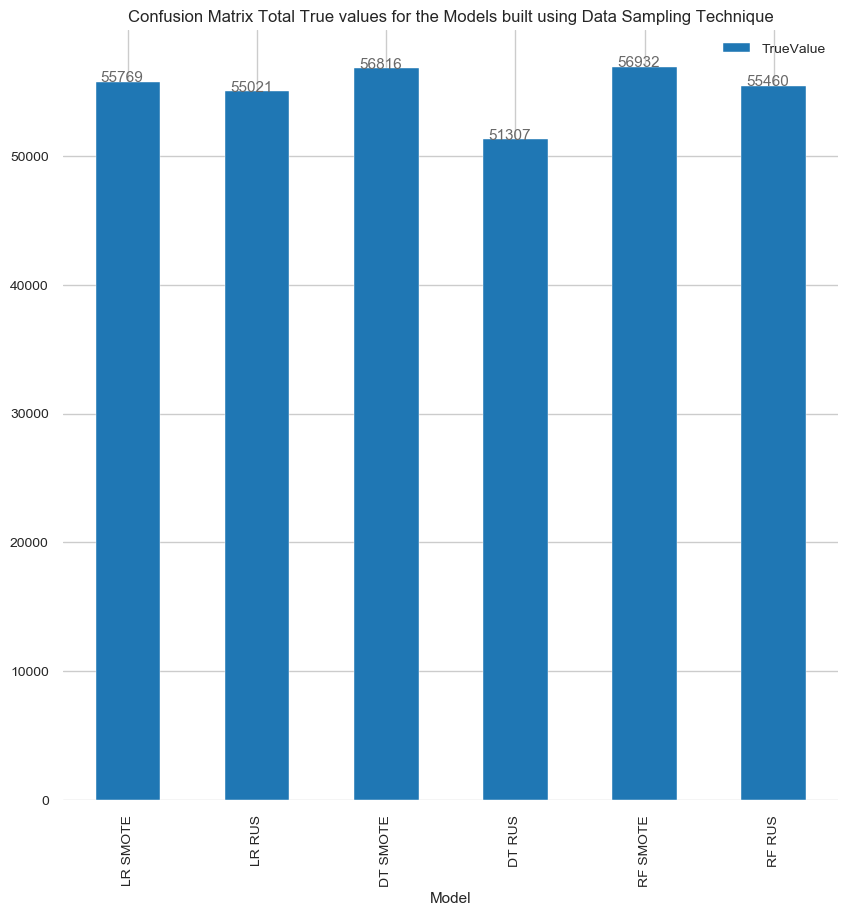

In [88]:
ax = pd_scrcp.plot(x='Model',y=['TrueValue'],kind='bar',figsize=(10,10))
plt.title("Confusion Matrix Total True values for the Models built using Data Sampling Technique")
for i in ax.patches:
        ax.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')


#### Observation

- We will compare these models by looking at AUC, TP, FP, FN values, Recall score. Since data was balanced using sampling technique, so only looking at accuracy score might mislead here. 
- LR SMOTE (97.9%), LR RUS(97.9%) and RF RUS (97.5%) are three top models which has given better AUC score. Lets look into these 3 models. 
- LR RUS (89.7%) has given better Recall score than LR SMOTE (88.5%) and RF RUS (85.1%) model. 
- LR RUS has given better TP, less FN and high FP values than LR SMOTE and RF RUS model. LR RUS and LR SMOTE has almost nearby these values.
- But LR SMOTE has given better total true values (TP + TN), F1-score and accuracy than LR RUS and RF RUS model.
- By comparing these parameters, it is observed that Logistic Regression model built on SMOTE (LR SMOTE) sample performed better than onther models.

<a id=section8></a>

## 8. Conclusion 

- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. (__From: Section 5.1__)
- In this situation, the predictive model developed using conventional machine learning algorithms could be biased and inaccurate. So models are evaluated using Data sampling technique - SMOTE and Random under Sampling. (__From: Section 6__)
- Model has selected with emphasis on lowering the predictions FN. A FN (a denied legitimate transaction) would be more detrimental to the consumer than a FP (an allowed fraudulent transaction).
- Decision Tree performed better than Logistic Regression and Random Forest model which has built on normal data sample without Data Sampling Technique.(__From: Section 7.4.1__)
- After using Data sampling technique, LR SMOTE (97.9%), LR RUS(97.9%) and RF RUS (97.5%) are three top models which has given better AUC score. (__From: Section 7.4__)
- LR RUS (89.7%) has given better Recall score than LR SMOTE (88.5%) and RF RUS (85.1%) model.
- LR RUS has given better TP, less FN and high FP values than LR SMOTE and RF RUS model. LR RUS and LR SMOTE model has given almost same values.
- But LR SMOTE has given better total true values (TP + TN),F1-score and accuracy than LR RUS and RF RUS model.
- By comparing all these parameters, it is observed that Logistic Regression model built on SMOTE sample performed better than other models. (__From: Section 7.4.1__)